In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from sklearn import metrics

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# Add Us import class
# from uszipcode import SearchEngine

<IPython.core.display.Javascript object>

# Load and Review Data

In [2]:
# Load data file into memory
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Take a look at raw data
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# Evaluate unique values of columns
for col in loan:
    print(col)
    print(loan[col].unique())

ID
[   1    2    3 ... 4998 4999 5000]
Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]

<IPython.core.display.Javascript object>

In [7]:
# Evaluate Unique Value Counts for flag field
col = ["Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
for i in col:
    print(i)
    print(loan[i].value_counts())

Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64
Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64
CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64
Online
1    2984
0    2016
Name: Online, dtype: int64
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


<IPython.core.display.Javascript object>

* Family and Education have limited values.
* Presonal_Loan, Securities_Account, CD_Account, Online and CreditCard are all boolean/flag fields.
* Only about 10% of bank customers have a Personal_Loan, Securities_Account, or CD Account
* The majority of customers have an Online Account
* Slightly less than half have a CreditCard through the bank

In [8]:
# Although nulls do not have a heavy impact on decision trees, its worth checking for null values in the data set.
loan.isnull().sum().sort_values(ascending=False)

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

<IPython.core.display.Javascript object>

* The data has no nulls.

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

* All features default to either an int or float.
* Education and Family could be treated as a categorical variable.  However, in this case a family of 1 < a family of 2 < a family of 3 < a family of 4.  The same is true for Education.  As a result, Family and Education will be left as as quantitative feature.
* There are no nulls.

In [10]:
# Check for duplicates
loan.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [11]:
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

* The average customer is 45 years old with an average household size of 2. 
* The average customer is quite educated (graduate degree) but has a median income just slightly above the national average.  This may be an indication that customers may work in the public sector or primary education.
* The average customer does not have a mortgage (or mortgage data has a lot of missing values).


## Univariate Analysis

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

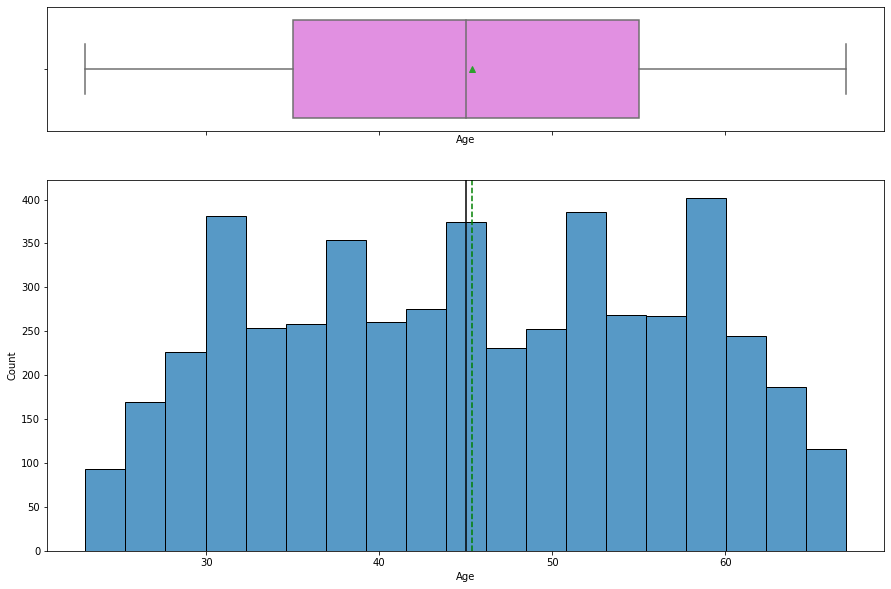

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(loan, "Age")

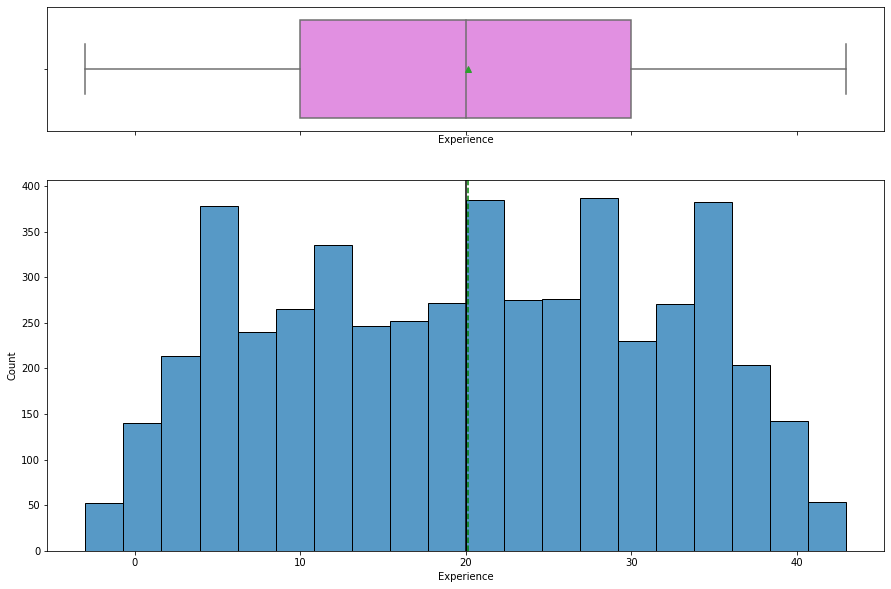

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(loan, "Experience")

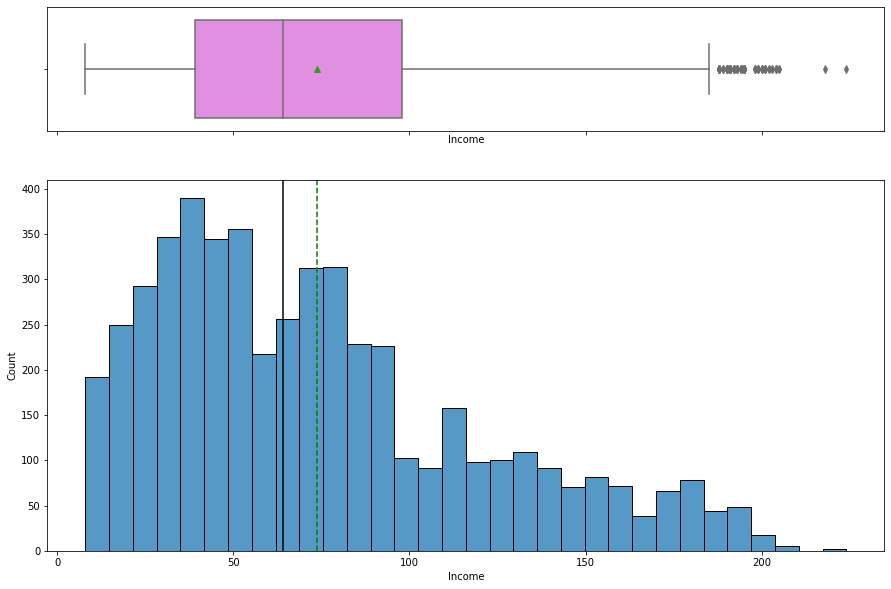

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(loan, "Income")

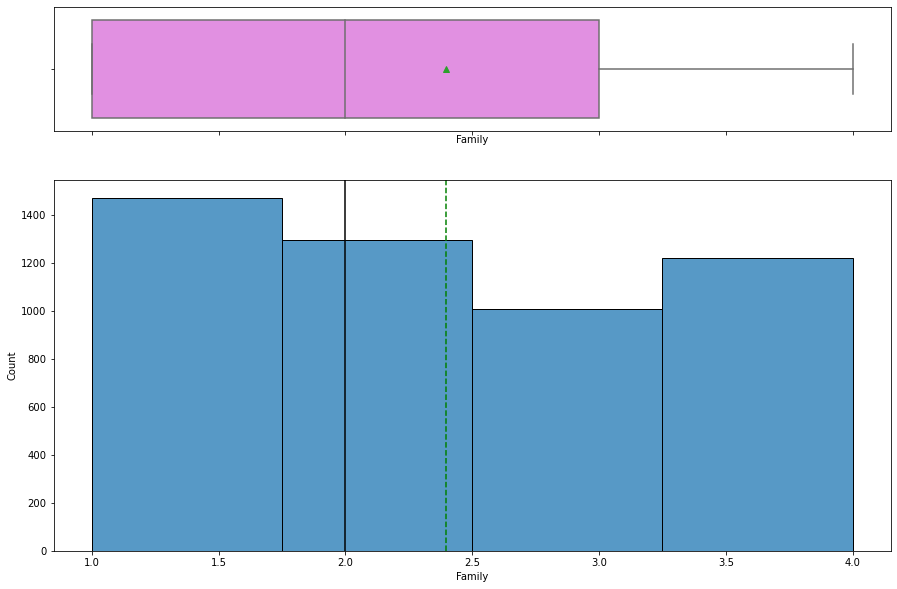

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(loan, "Family", bins=4)

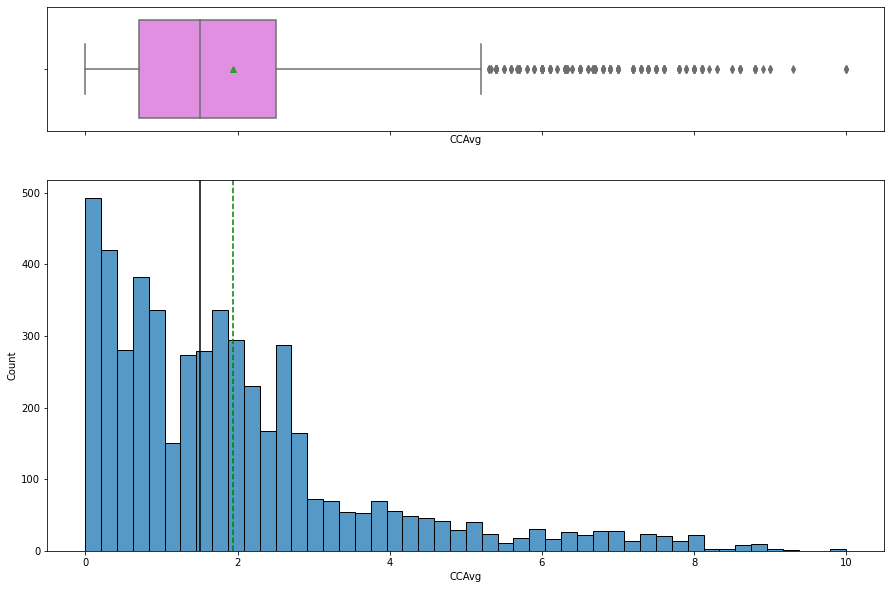

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(loan, "CCAvg")

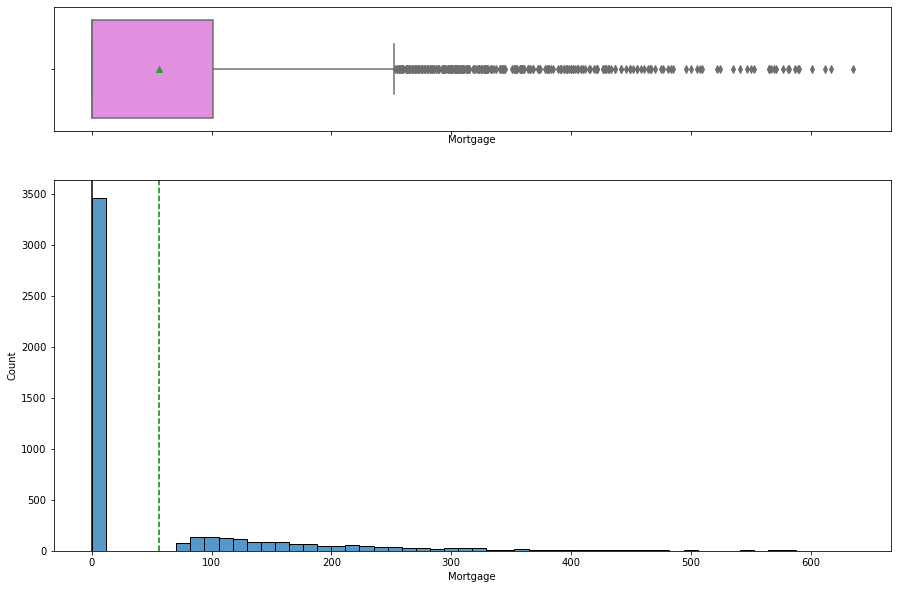

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Mortgage")

* There is a very large number of zero mortages.  Mortgage needs to be normalized.  

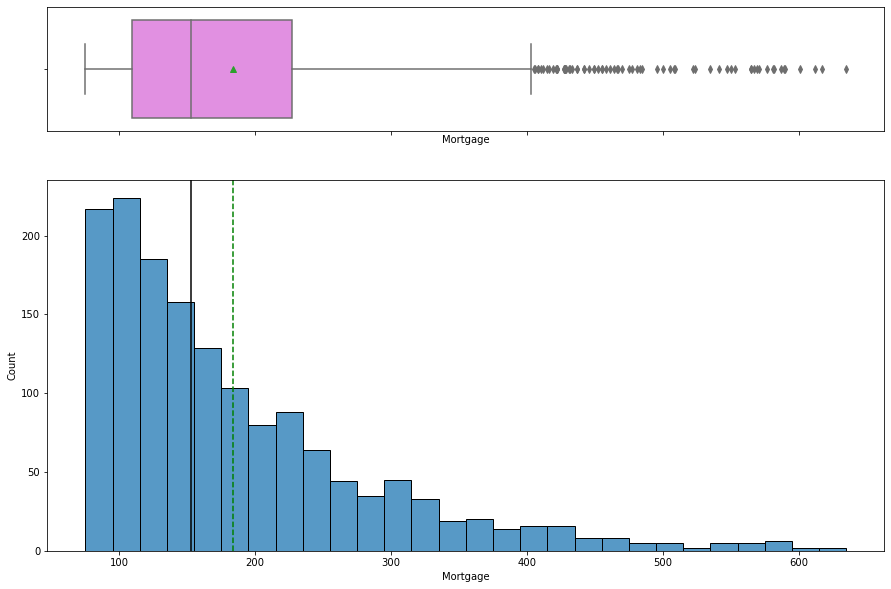

<IPython.core.display.Javascript object>

In [19]:
# Checking what the non-zero mortgage distribution looks like.
histogram_boxplot(loan[loan["Mortgage"] != 0], "Mortgage")

In [20]:
print("Zero Mortgage ", loan[loan["Mortgage"] == 0]["Mortgage"].count())
print("Mortgage ", loan[loan["Mortgage"] != 0]["Mortgage"].count())
print(
    "Percent Zero Mortgage",
    100 * loan[loan["Mortgage"] == 0]["Mortgage"].count() / loan["Mortgage"].count(),
    "%",
)

Zero Mortgage  3462
Mortgage  1538
Percent Zero Mortgage 69.24 %


<IPython.core.display.Javascript object>

* 40% of Customers have a Mortgage.  For those holding a Mortgage, the Mortgage is positively skewed with a median of about 160K.
* Age and Experience have a relatively normal distribution.
* CCAvg and Mortage both have significant outliers and are heavily positively skewed (even with the 0 values removed from Mortgate).  Both of these features will need to be normalized.
* Income is somewhat positively skewed.

## Bivaruate Analysis

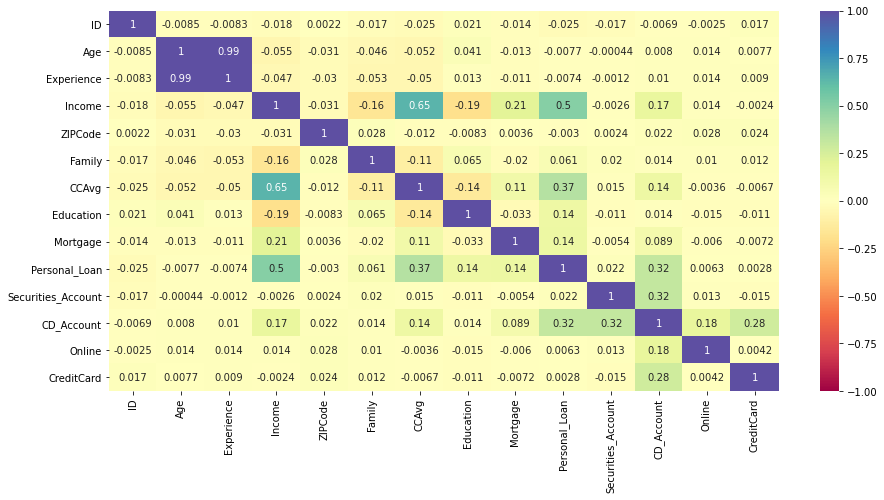

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

* There appears to be little correlation between Personal Loan and other attribues.  The strongest correlation is with Income.
* Age and Experience are highly correlated.
* There is a significant correlation between CCAvg and Income.


In [22]:
loan_graph = loan[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "Education",
        "Mortgage",
        "Personal_Loan",
    ]
]

<IPython.core.display.Javascript object>

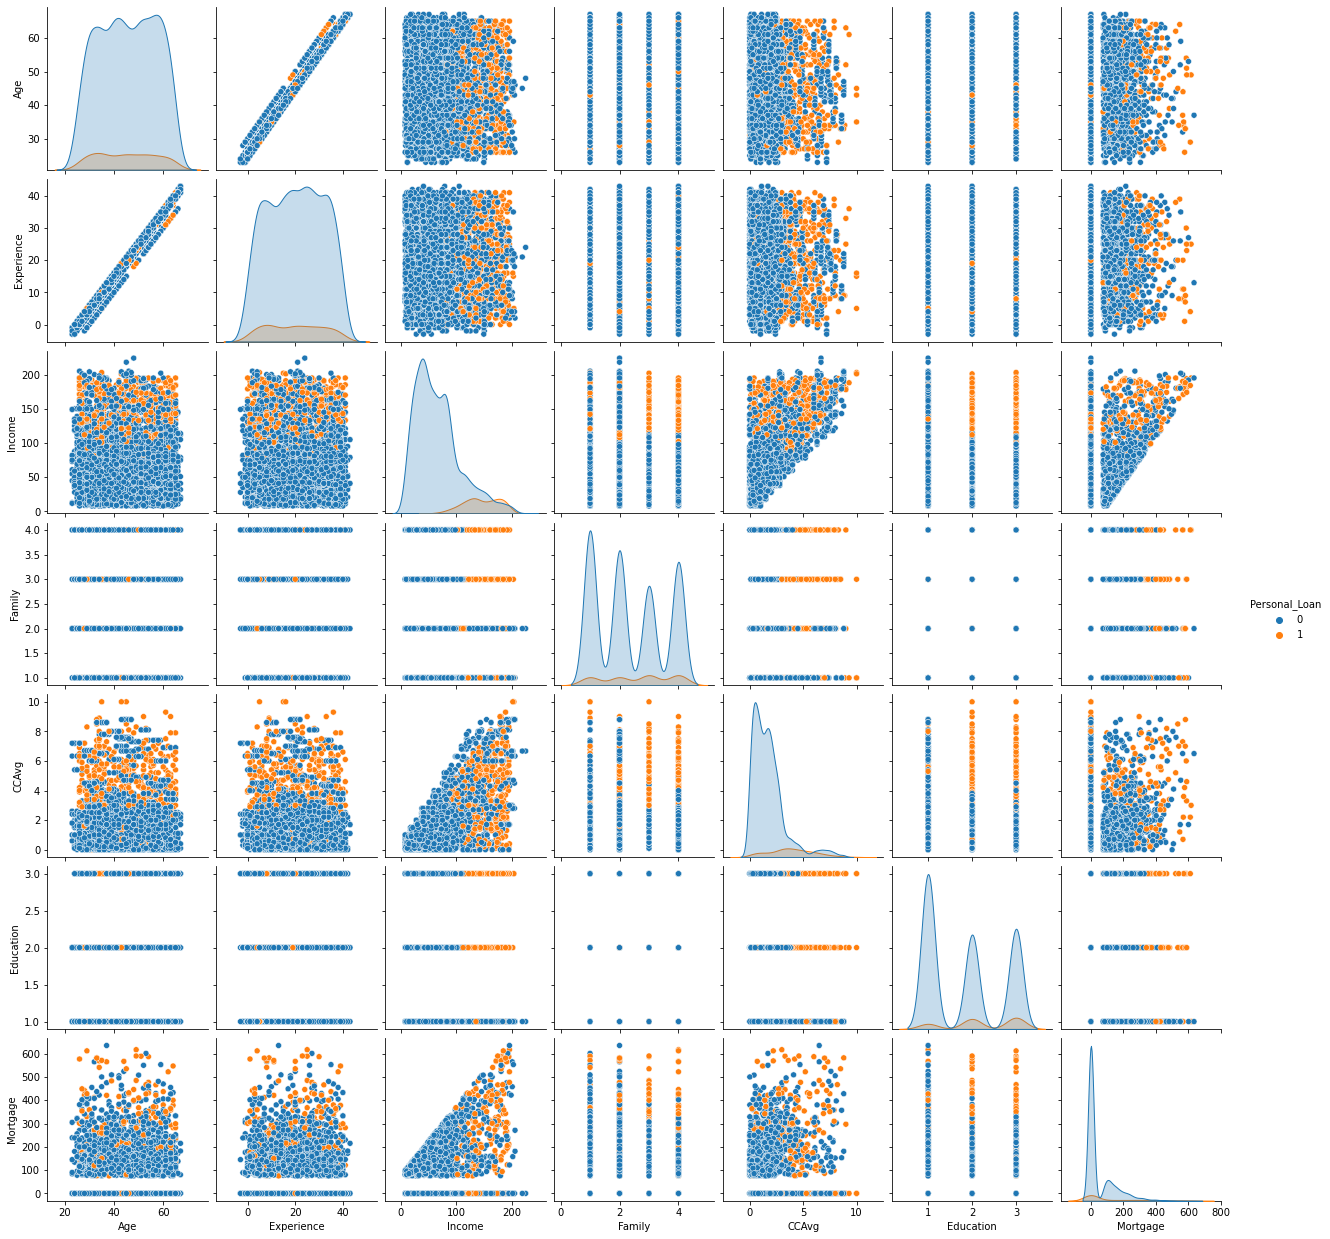

<IPython.core.display.Javascript object>

In [23]:
sns.pairplot(
    data=loan_graph,
    hue="Personal_Loan",
)
plt.show()

* As observed in the correlation matrix above, Age and Experience are highly correlated.
* CCAvg and Income appear to be somewhat correlated as is Income and Mortgage.
* Education may be worth normalizing as well.

# Logistic Regression

## Data Preparation for Logistic Regression

In [24]:
# Drop columns that are not useful to the models.
# I would love to use zipcode but I could not get the uszipcode class to install.  Thus I will remove it.
loan.drop("ID", 1, inplace=True)
loan.drop("ZIPCode", 1, inplace=True)

<IPython.core.display.Javascript object>

In [25]:
# For logistic regression, I will change 0 dollar Mortgage values to the Mortgage mean and normalize CCAvg and Mortgate.
loan_log_reg = loan.copy()

<IPython.core.display.Javascript object>

In [26]:
loan_log_reg

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [27]:
# Normalizing Mortgage
# For zero value mortgages, assign mean
loan_log_reg_mean = loan_log_reg[(loan_log_reg[["Mortgage"]] != 0).all(axis=1)]
mortgage_mean = loan_log_reg_mean["Mortgage"].mean()
# mortgage_mean = int(mortgage_mean)

loan_log_reg["Mortgage"] = loan_log_reg["Mortgage"].apply(
    lambda x: mortgage_mean if x == 0 else x
)
mortgage_mean

183.67620286085827

<IPython.core.display.Javascript object>

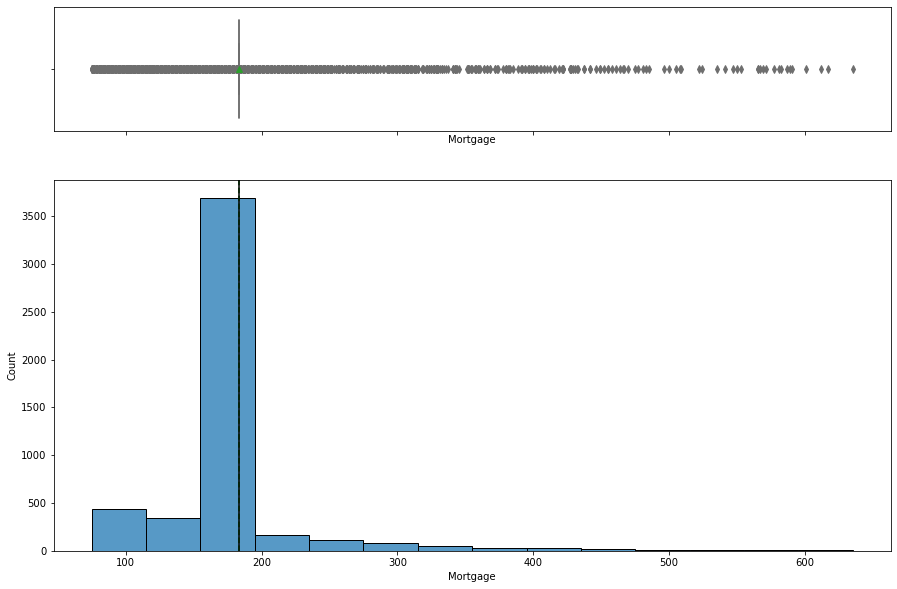

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(loan_log_reg, "Mortgage")

In [29]:
loan_log_reg["CCAvg"].isna().sum()

0

<IPython.core.display.Javascript object>

<AxesSubplot:>

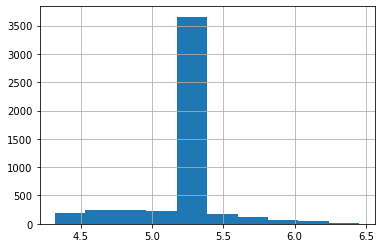

<IPython.core.display.Javascript object>

In [30]:
# Try to normalize the curve for mortgage
loan_log_reg["Mortgage"] = np.log(loan_log_reg["Mortgage"])
loan_log_reg["Mortgage"].hist()

* Mortgage is now somewhat more normalized.

<AxesSubplot:>

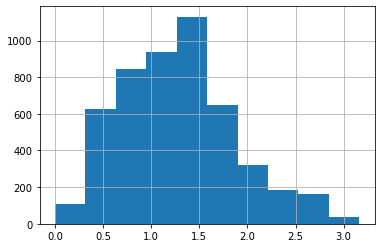

<IPython.core.display.Javascript object>

In [31]:
# Normalize CCAvg

loan_log_reg["CCAvg"] = np.sqrt(loan_log_reg["CCAvg"])
loan_log_reg["CCAvg"].hist()


* CCAvg is more normalized now but there is still a significant outlier at 0.

In [32]:
loan_log_reg["CCAvg"].isna().sum()

0

<IPython.core.display.Javascript object>

In [33]:
loan_log_reg[(loan_log_reg[["CCAvg"]] == 0).all(axis=1)]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
63,42,17,32,4,0.0,2,5.213174,0,0,0,1,0
128,38,14,74,2,0.0,1,5.213174,0,1,0,1,0
198,27,3,59,4,0.0,1,4.499810,0,1,0,1,0
210,51,26,20,2,0.0,1,5.213174,0,0,0,0,0
215,38,14,92,2,0.0,1,5.517453,0,0,0,1,1
253,47,21,138,1,0.0,1,5.213174,0,0,0,0,0
260,51,27,58,1,0.0,1,5.213174,0,0,0,0,1
296,34,9,122,1,0.0,1,5.213174,0,0,0,1,0
444,64,40,91,2,0.0,3,5.213174,0,0,0,1,1
594,50,26,85,1,0.0,1,4.969813,0,0,0,0,0


<IPython.core.display.Javascript object>

* There are 231 rows of CC Avg of 0 and is likely a legitimate balance for folks who either dont have a credit card or rarely use it for large purchases.

In [34]:
# Insure any data manipulation did not create nulls
print("CCAvg Nulls:", loan_log_reg["CCAvg"].isna().sum())
print("Mortgage Nulls:", loan_log_reg["Mortgage"].isna().sum())

CCAvg Nulls: 0
Mortgage Nulls: 0


<IPython.core.display.Javascript object>

<AxesSubplot:>

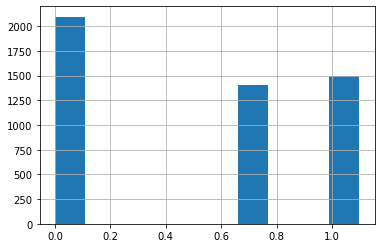

<IPython.core.display.Javascript object>

In [35]:
# Attempt to normalize Education
np.log(loan_log_reg["Education"]).hist()

<AxesSubplot:>

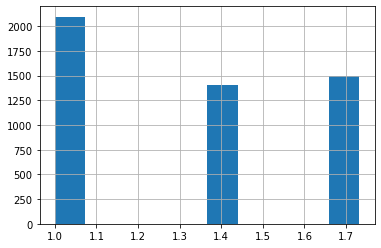

<IPython.core.display.Javascript object>

In [36]:
np.sqrt(loan_log_reg["Education"]).hist()

* It doesnt appear that Education can be normalized.  Leaving it as is.

<AxesSubplot:>

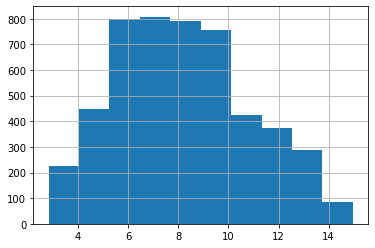

<IPython.core.display.Javascript object>

In [37]:
# Attempting to normalize income
# Sqrt creates a more normal Income distribution
loan_log_reg["Income"] = np.sqrt(loan_log_reg["Income"])
loan_log_reg["Income"].hist()

## Split Data

In [38]:
from sklearn.model_selection import train_test_split

X = loan_log_reg.drop("Personal_Loan", axis=1)  # Predictor feature columns (8 X m)
Y = loan_log_reg["Personal_Loan"]  # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,47,22,5.916080,2,1.140175,1,5.213174,0,0,1,0
4768,38,14,6.244998,1,1.414214,2,5.213174,0,0,1,0
65,59,35,11.445523,1,1.949359,1,5.213174,0,0,1,1
177,29,3,8.062258,4,1.341641,2,5.497168,0,0,0,0
4489,39,13,4.582576,3,0.447214,2,5.213174,0,0,1,0


<IPython.core.display.Javascript object>

In [39]:
# for scaling/normalizing numerical data
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler preprocessing class
sc = StandardScaler()

# Apply fit_transform to numeric columns to scale the numeric variables
x_train_transform = sc.fit_transform(x_train)  ##best transformation for train data
x_test_transform = sc.transform(x_test)  ##do not fit test data

x_train_transform

array([[ 0.13597665,  0.15613728, -0.84098433, ..., -0.25835623,
         0.83164805, -0.650648  ],
       [-0.64621189, -0.53857809, -0.71755358, ..., -0.25835623,
         0.83164805, -0.650648  ],
       [ 1.1788947 ,  1.28504976,  1.23400973, ..., -0.25835623,
         0.83164805,  1.53692933],
       ...,
       [ 0.04906681,  0.15613728, -1.07536486, ..., -0.25835623,
         0.83164805,  1.53692933],
       [ 0.04906681,  0.15613728,  0.47915297, ..., -0.25835623,
         0.83164805, -0.650648  ],
       [-0.64621189, -1.05961462,  0.10095141, ..., -0.25835623,
         0.83164805, -0.650648  ]])

<IPython.core.display.Javascript object>

In [40]:
# Check Split of data
print(
    "{0:0.2f}% data is in training set".format(
        (len(x_train_transform) / len(loan_log_reg.index)) * 100
    )
)
print(
    "{0:0.2f}% data is in test set".format(
        (len(x_test_transform) / len(loan_log_reg.index)) * 100
    )
)

70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

In [41]:
print(
    "Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(
        len(loan_log_reg.loc[loan_log_reg["Personal_Loan"] == 1]),
        (
            len(loan_log_reg.loc[loan_log_reg["Personal_Loan"] == 1])
            / len(loan_log_reg.index)
        )
        * 100,
    )
)
print(
    "Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(
        len(loan_log_reg.loc[loan_log_reg["Personal_Loan"] == 0]),
        (
            len(loan_log_reg.loc[loan_log_reg["Personal_Loan"] == 0])
            / len(loan_log_reg.index)
        )
        * 100,
    )
)
print("")
print(
    "Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



<IPython.core.display.Javascript object>

* As expected all values are around the 90/10 split

## Run Logistic Regression

In [42]:
pd.DataFrame(x_train_transform).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.135977,0.156137,-0.840984,-0.344955,-0.187256,-1.055713,0.151590,-0.341736,-0.258356,0.831648,-0.650648
1,-0.646212,-0.538578,-0.717554,-1.217944,0.266995,0.135453,0.151590,-0.341736,-0.258356,0.831648,-0.650648
2,1.178895,1.285050,1.234010,-1.217944,1.154063,-1.055713,0.151590,-0.341736,-0.258356,0.831648,1.536929
3,-1.428400,-1.493812,-0.035604,1.401022,0.146697,0.135453,1.184597,-0.341736,-0.258356,-1.202432,-0.650648
4,-0.559302,-0.625418,-1.341399,0.528033,-1.335924,0.135453,0.151590,-0.341736,-0.258356,0.831648,-0.650648


<IPython.core.display.Javascript object>

In [43]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(x_train_transform, y_train)
# predict on test
y_predict = model.predict(x_test_transform)


coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.211032  0.271686  2.918839  0.785258  0.403778  1.356782  0.058032   

          7         8         9        10  intercept  
0 -0.335577  0.875796 -0.292207 -0.505745  -5.158728  


<IPython.core.display.Javascript object>

In [44]:
model_score = model.score(x_test_transform, y_test)
print(model_score)

0.9506666666666667


<IPython.core.display.Javascript object>

In [45]:
##  Function to calculate precision score
def get_precision_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return precision_score(target, prediction)

<IPython.core.display.Javascript object>

In [46]:
##  Function to calculate precision score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [47]:
print("Precision Score: ", get_precision_score(model, x_test_transform, y_test))

Precision Score:  0.8504672897196262


<IPython.core.display.Javascript object>

In [48]:
# Check F1 Score
recall = get_recall_score(model, x_test_transform, y_test)
precision = get_precision_score(model, x_test_transform, y_test)
f1_score = (2 * recall * precision) / (recall + precision)
print("F1 Score:", f1_score)

F1 Score: 0.7109375000000001


<IPython.core.display.Javascript object>

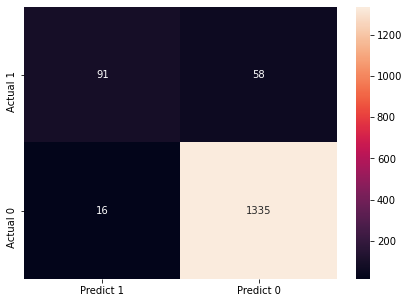

<IPython.core.display.Javascript object>

In [49]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(
    cm,
    index=[i for i in ["Actual 1", " Actual 0"]],
    columns=[i for i in ["Predict 1", "Predict 0"]],
)
plt.figure(figsize=(7, 5))
sns.heatmap(df_cm, annot=True, fmt="g")
plt.show()

* In the case of this particular case study, the goal would be to have minimum False Negatives because the cost of processing and rejecting an unqualified loan candidate (False Positive) is lower than the missed opportunity of not offering a qualified customer a loan (False Negative).
* The mean accuracy is also evaluated.

* Model Score is quite high at nearly 95% with Logistic Regression. 
* The Precision is quite good too at 85%.  
* F1 Score is 71%.  While Precision and Model Score is the more important metric, the F1 Score is not very good.
* False positives are very low.  False negatives are low but it would be nice to improve the rate of false negative.  The goal for this model is to have as few as possible false negatives.

# Decision Tree

## Decision Tree Model Evaluation Criteria

* Because it would be better to identify all potential loan candidates to advertise to (no False Negatives) than to advertise to a candidate who is not qualified (False Positive).  Under the cercumstances I will check precision and F1 score as it is worthwhile to evaluate rate of false negatives and overall false negatives and false positives together.

## Split Data

In [50]:
X = loan.drop("Personal_Loan", axis=1)  # Features
y = loan["Personal_Loan"]  # Labels (Target Variable)

<IPython.core.display.Javascript object>

In [51]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 11) (1500, 11)


<IPython.core.display.Javascript object>

In [52]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [53]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

* As expected we see 9% of customers with a Loan.

## Model evaluation criterion

* Because there is more risk in this case to have a false negative then a false positive in this case, Precision will be used to evaluate model.

In [54]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [55]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.095, 1: 0.905}, random_state=1
)

<IPython.core.display.Javascript object>

In [56]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.095, 1: 0.905}, random_state=1)

<IPython.core.display.Javascript object>

## Checking Model Performance on Training Set

In [57]:
# Check Precision
decision_tree_perf_train = get_precision_score(model, X_train, y_train)
decision_tree_perf_test = get_precision_score(model, X_test, y_test)

print("Precision Score Train:", decision_tree_perf_train)
print("Precision Score Test:", decision_tree_perf_test)

Precision Score Train: 1.0
Precision Score Test: 0.8873239436619719


<IPython.core.display.Javascript object>

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

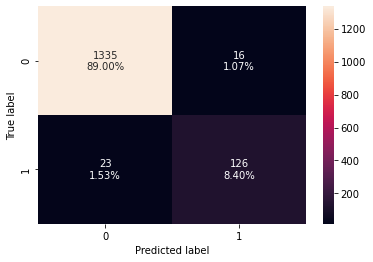

<IPython.core.display.Javascript object>

In [59]:
confusion_matrix_sklearn(model, X_test, y_test)

In [60]:
# Check F1 Score
recall = get_recall_score(model, X_test, y_test)
precision = get_precision_score(model, X_test, y_test)
f1_score = (2 * recall * precision) / (recall + precision)
print("F1 Score:", f1_score)

F1 Score: 0.865979381443299


<IPython.core.display.Javascript object>

* The unpruned model is actually performing relatively well with a nearly 89% precision score and an 86% F1 Score.  
* Next step is to perform pre-pruning and post pruning to attempt to improve results.

## Visualizing the Decision Tree

In [61]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

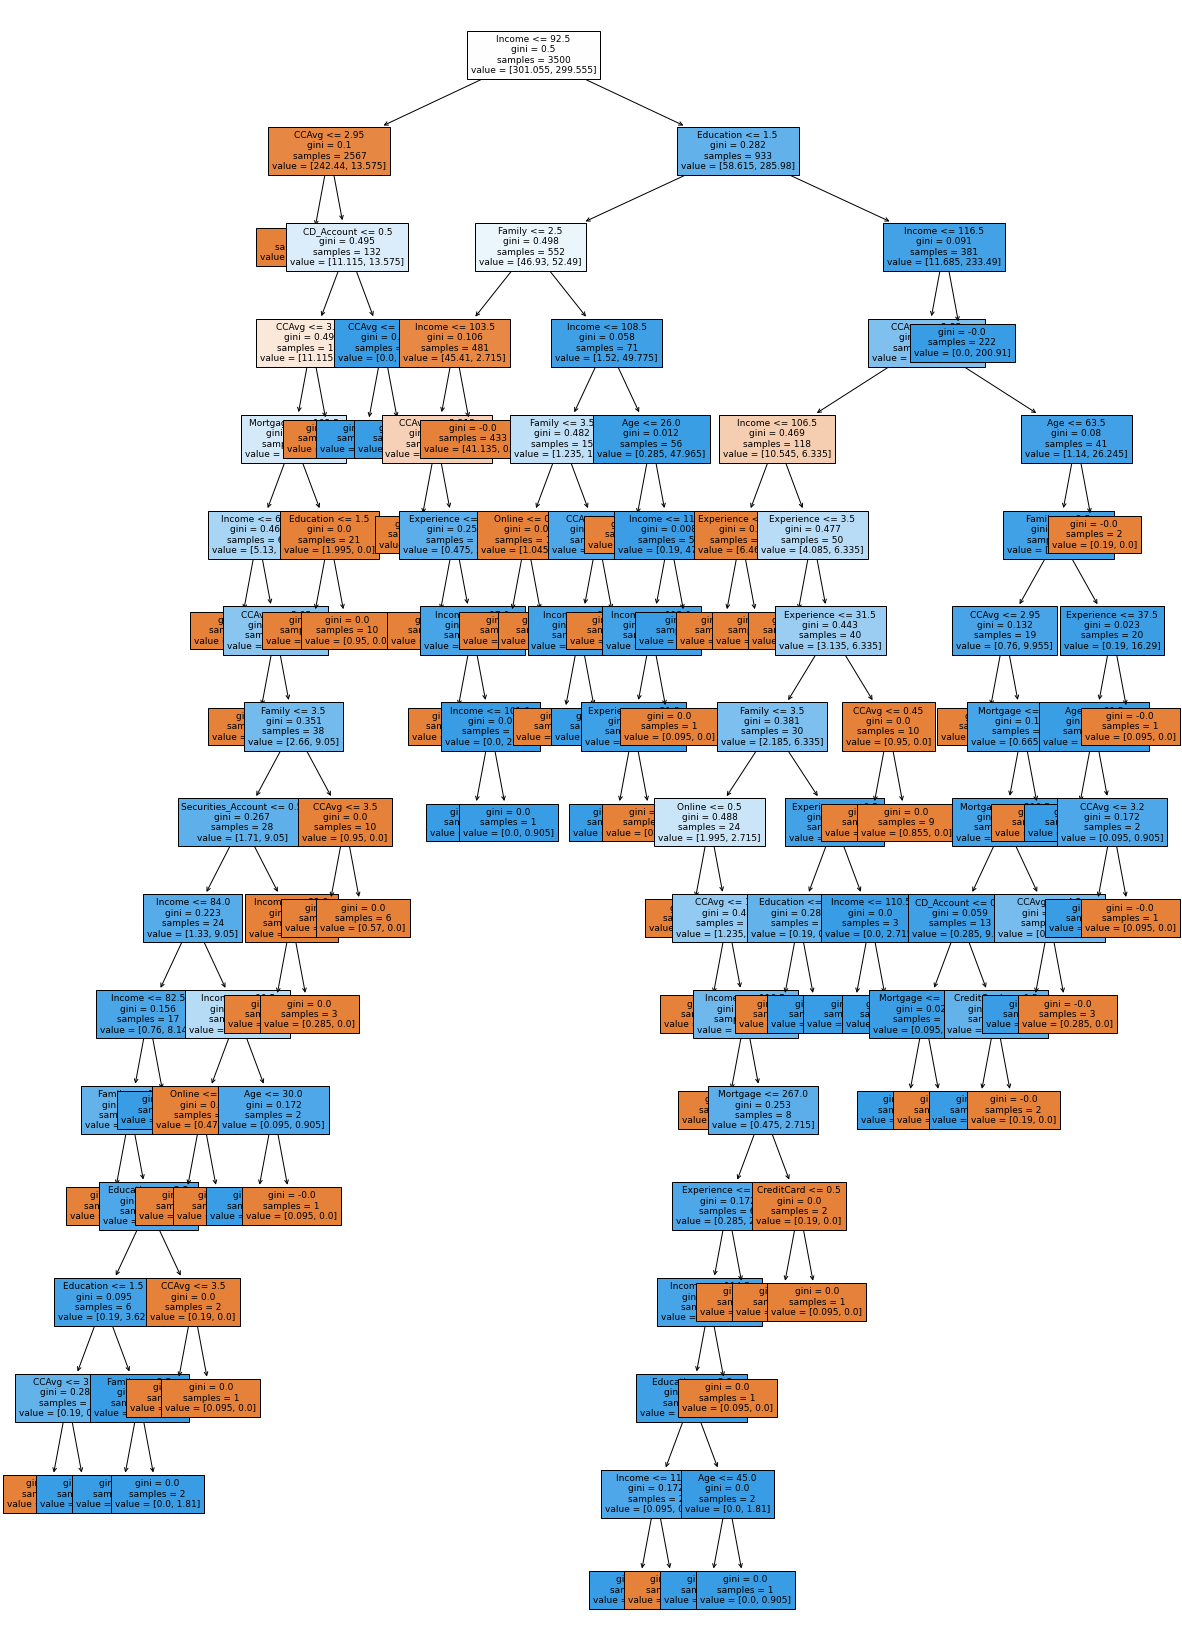

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [63]:
# Checking the Gini importance of features

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.638214
Family              0.149991
CCAvg               0.093271
Education           0.087172
Experience          0.009160
CD_Account          0.007647
Mortgage            0.007212
Age                 0.002426
Online              0.002005
Securities_Account  0.001856
CreditCard          0.001046


<IPython.core.display.Javascript object>

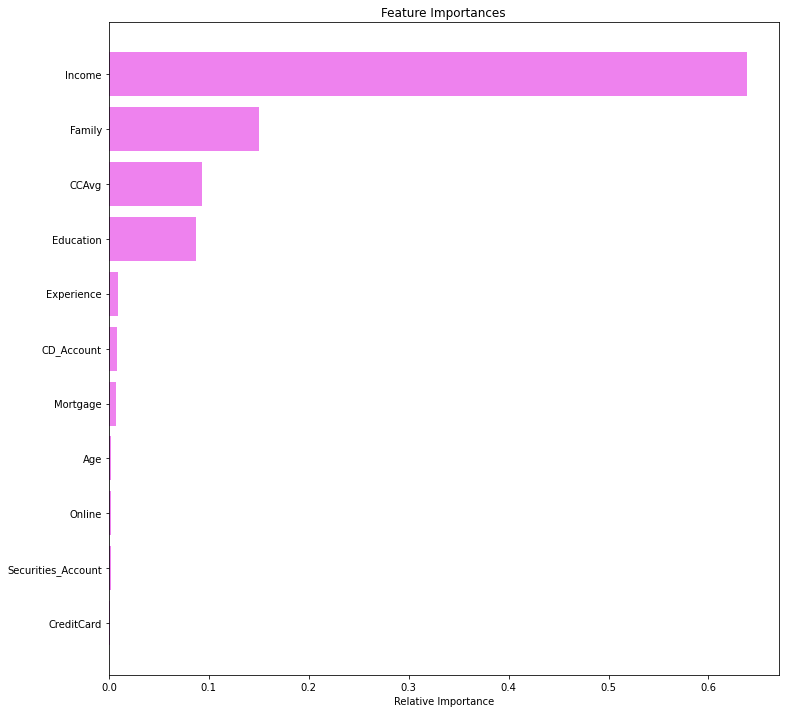

<IPython.core.display.Javascript object>

In [64]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In an unpruned tree, the most important feature by a large margin is Income.  Other significant features include Family, CCAvg, and Education.

## Pre-Pruning

### Build Model

In [65]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [66]:
# Choose the type of classifier.
model = DecisionTreeClassifier(random_state=1)
# estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer, cv=5)
# grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

### Evaluate Model

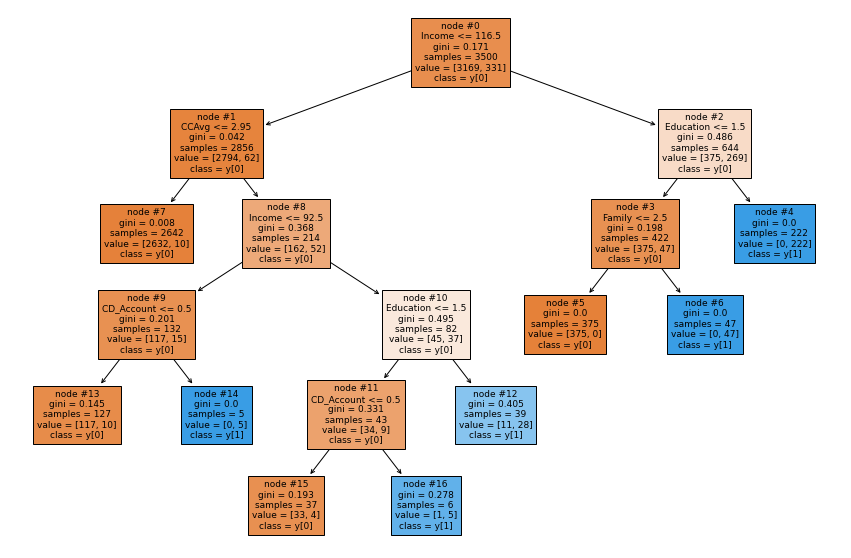

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [68]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

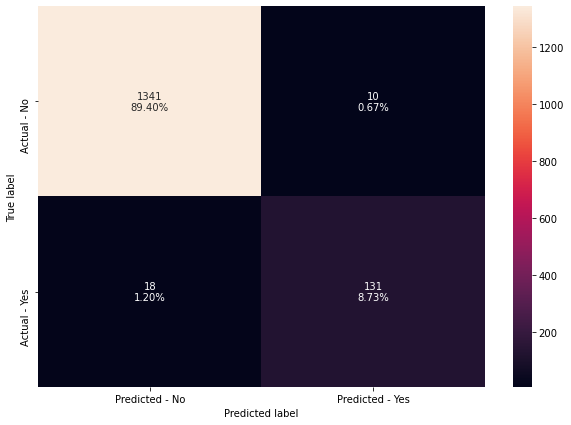

<IPython.core.display.Javascript object>

In [69]:
make_confusion_matrix(estimator, y_test)

In [70]:
# Precision on train and test
print("Precision on training set: ", get_precision_score(estimator, X_train, y_train))
print("Precision on test set: ", get_precision_score(estimator, X_test, y_test))

Precision on training set:  0.9623824451410659
Precision on test set:  0.9290780141843972


<IPython.core.display.Javascript object>

In [71]:
# Check F1 Score
recall = get_recall_score(estimator, X_test, y_test)
precision = get_precision_score(estimator, X_test, y_test)
f1_score = (2 * recall * precision) / (recall + precision)
print("F1 Score:", f1_score)
# f1_score
# precision
# estimator

F1 Score: 0.9034482758620689


<IPython.core.display.Javascript object>

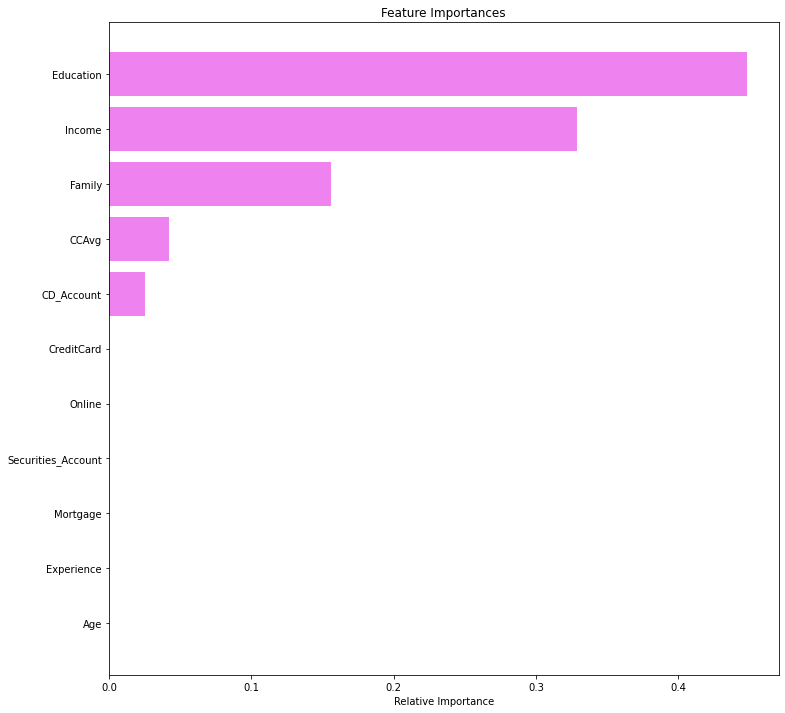

<IPython.core.display.Javascript object>

In [72]:
# Checking the Gini importance of features

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [73]:
# Checking the Gini importance of features

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.447999
Income              0.328713
Family              0.155711
CCAvg               0.042231
CD_Account          0.025345
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

* For a pre-pruned tree, the most important features have become Education followed by Income and Family.
* Precision is very good at almost 93%.
* F1 Score is also very good at 90%.

## Post-Pruning

### Build Model

In [74]:
#Build Model

model = DecisionTreeClassifier(random_state=1)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


<IPython.core.display.Javascript object>

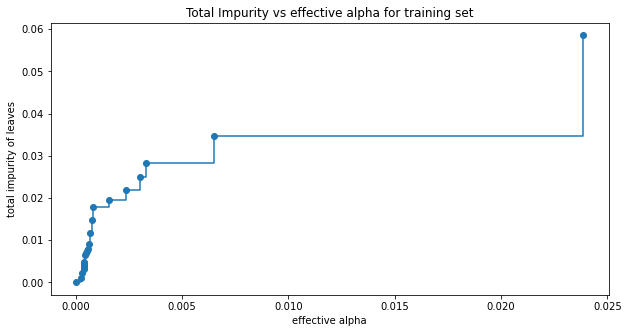

<IPython.core.display.Javascript object>

In [75]:
# Compare Impurity to Alphas

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [76]:
# Train Decision Tree using best alpha

# clfs = []
models = []
for ccp_alpha in ccp_alphas:
    # clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    # clf.fit(X_train, y_train)
    model.fit(X_train, y_train)
    # clfs.append(clf)
    models.append(model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        # clfs[-1].tree_.node_count, ccp_alphas[-1]
        models[-1].tree_.node_count,
        ccp_alphas[-1],
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

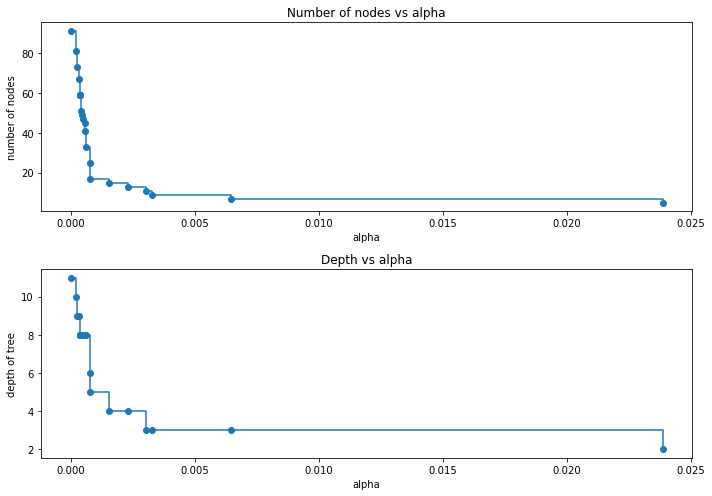

<IPython.core.display.Javascript object>

In [77]:
# Graph alph to Nodes and Alpha to Tree Depth

models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in models]

depth = [model.tree_.max_depth for model in models]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [78]:
# List of all alphas evaluated
print("Alpha Values:", ccp_alphas)

Alpha Values: [0.         0.00022278 0.0002684  0.00035854 0.00038095 0.00038095
 0.00038095 0.00038095 0.00040909 0.00047619 0.00050794 0.00058203
 0.00059259 0.00064143 0.00076921 0.00079185 0.00155164 0.00233306
 0.00302352 0.0032938  0.00647281 0.02386594]


<IPython.core.display.Javascript object>

### Evaluate Performance

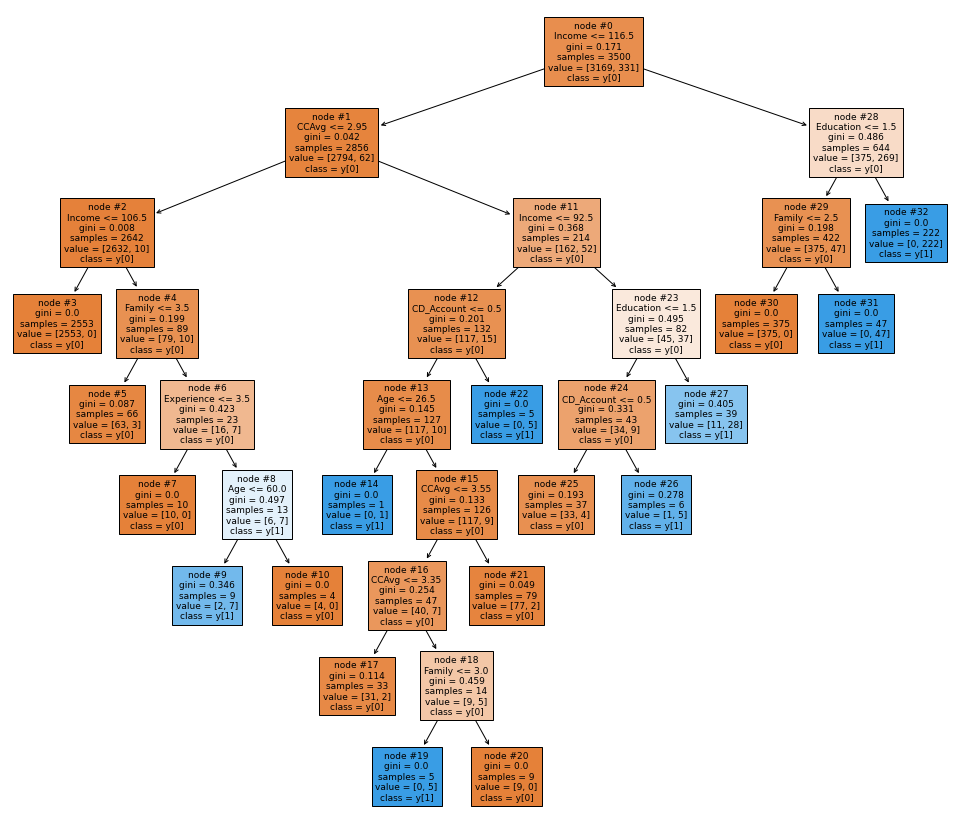

<IPython.core.display.Javascript object>

In [79]:
# Identify best tree and display it
test_scores = [model.score(X_test, y_test) for model in models]
index_best_model = np.argmax(test_scores)
best_model = models[index_best_model]

plt.figure(figsize=(17, 15))

tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [80]:
print(best_model)
print("Training accuracy of best model: ", best_model.score(X_train, y_train))
print("Test accuracy of best model: ", best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.984


<IPython.core.display.Javascript object>

* The Accuracy of this model is very high.  Lets evaluate the Precision and F1 Score as they are of more importance.

In [81]:
# Evaluate Precision vs Alpha Values
precision_train = []
for model in models:
    pred_train3 = model.predict(X_train)
    values_train = metrics.precision_score(y_train, pred_train3)
    precision_train.append(values_train)

<IPython.core.display.Javascript object>

In [82]:
precision_test = []
for model in models:
    pred_test3 = model.predict(X_test)
    values_test = metrics.precision_score(y_test, pred_test3)
    precision_test.append(values_test)

<IPython.core.display.Javascript object>

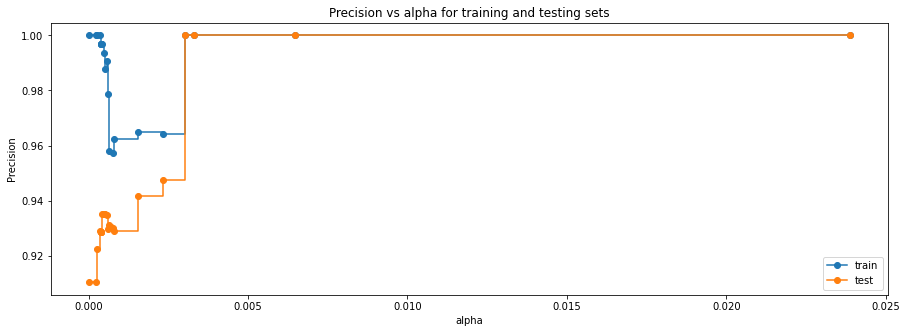

<IPython.core.display.Javascript object>

In [83]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [84]:
# Checking index of model with the max precision score
print(np.argmax(precision_test))

18


<IPython.core.display.Javascript object>

In [85]:
# This is the alpha value for the best precision test score
# This is not the alpha score the model selected.
print(ccp_alphas[18])

0.003023521760901227


<IPython.core.display.Javascript object>

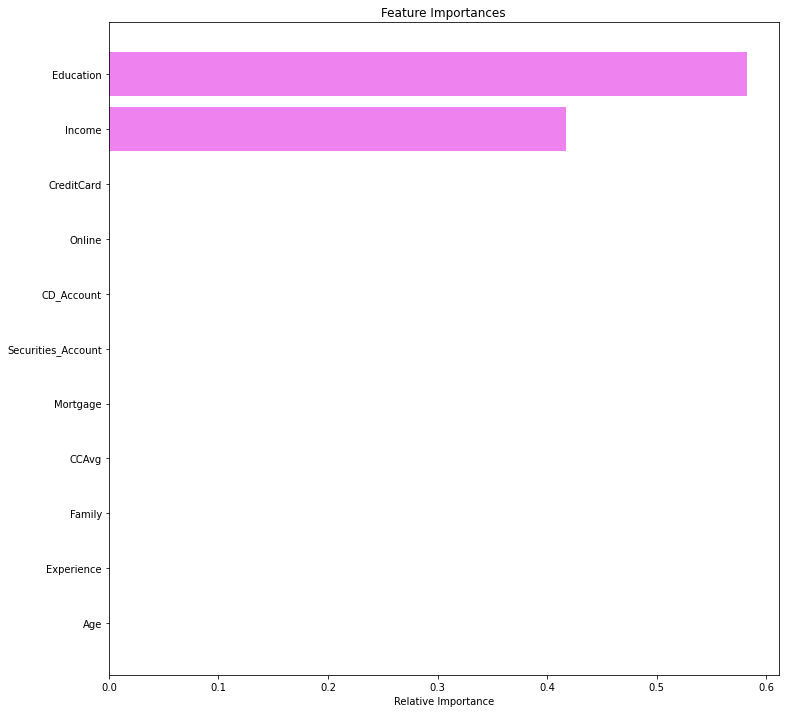

<IPython.core.display.Javascript object>

In [86]:
# Check the most important features for this model
## creating a list of column names
feature_names = X_train.columns.to_list()

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [87]:
# Checking the Gini importance of features

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.582291
Income              0.417709
Age                 0.000000
Experience          0.000000
Family              0.000000
CCAvg               0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

In [88]:
##  Function to calculate recall score
def get_updated_precision_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
    print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [89]:
# Precision on train and test
get_updated_precision_score(best_model)

Precision on training set :  0.9580838323353293
Precision on test set :  0.9310344827586207


<IPython.core.display.Javascript object>

In [90]:
##  Function to calculate recall score
def get_updated_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

<IPython.core.display.Javascript object>

In [91]:
# Recall on train and test
get_updated_recall_score(best_model)

Recall on training set :  0.9667673716012085
Recall on test set :  0.9060402684563759


<IPython.core.display.Javascript object>

In [92]:
# Check F1 Score
recall = 0.9060402684563759
precision = 0.9310344827586207
f1_score = (2 * recall * precision) / (recall + precision)
print("F1 Score:", f1_score)

F1 Score: 0.9183673469387755


<IPython.core.display.Javascript object>

* The Post Pruned Tree is getting the best results with a Precision Score of 93% and an F1 Score of 91.8%

In [93]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Initial Decision Tree",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Precision": [1, 1, 0.96, 0.95],
        "Test_Precision": [0.85, 0.88, 0.92, 0.93],
    }
)
comparison_frame

,Model,Train_Precision,Test_Precision
0,Logistic Regression,1.00,0.85
1,Initial Decision Tree,1.00,0.88
2,Decision tree with hyperparameter tuning,0.96,0.92
3,Decision tree with post-pruning,0.95,0.93


<IPython.core.display.Javascript object>

# Conclusion

* The best Precision Score was obtained from a Post-Pruned Decision Tree Model scoring a .93 Precision Score.  However, all models performed relatively well.
* The F1 Score for this model is also very good at .91.
* The most important feature for identifying good customer candidates for a loan are Education and Income.
* The best candidates to target for a personal loan would have a higher Education and higher Income.